In [1]:
import numpy as onp
import jax.numpy as jnp
from matplotlib import pyplot as plt


Number of molecules: 64.0


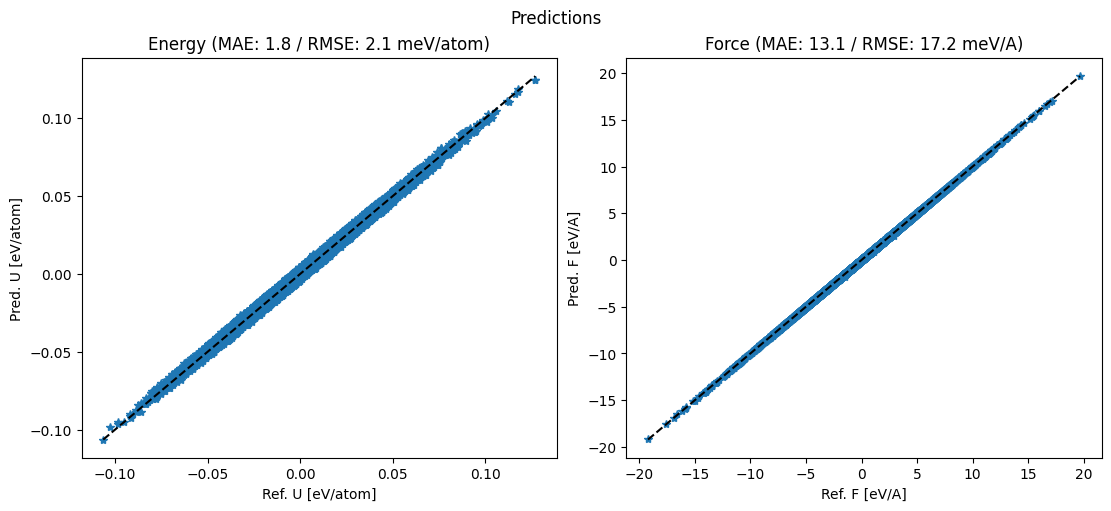

In [2]:
predictions = onp.load("preds_validation.npz")
reference_data = onp.load("data_validation.npz")
# scaling factor to account for unit conversions
scale_energy = 96.4853722 # [eV] -> [kJ/mol]
scale_pos = 0.1  # [Å] -> [nm]

# NOTE: predictions are of total energy and require scaling
# reference data is already in per-atom energy
# num_atoms = onp.sum(reference_data["mask"], axis=1)
num_atoms = reference_data["F"].shape[1] / 3
print(f"Number of molecules: {num_atoms}")
pred_U_per_atom = predictions["U"] / num_atoms
ref_U_per_atom = reference_data["U"] / num_atoms # not sure if I should compare num_atoms

# energies
mae_U = onp.mean(onp.abs(pred_U_per_atom - ref_U_per_atom) / scale_energy)
rmse_U = onp.sqrt((((pred_U_per_atom - ref_U_per_atom) / scale_energy) ** 2).mean())
min_U = min(min(pred_U_per_atom), min(ref_U_per_atom)) / scale_energy
max_U = max(max(pred_U_per_atom), max(ref_U_per_atom)) / scale_energy
line_U = onp.linspace(min_U, max_U)

# forces
mae_F = onp.mean(onp.abs(predictions['F'] - reference_data[
    'F'])) / scale_energy * scale_pos
rmse_F = onp.sqrt((((predictions['F'] - reference_data['F']) / scale_energy * scale_pos) ** 2).mean())
min_F = min(min(predictions["F"][::50].ravel()), min(reference_data["F"][::50].ravel())) / scale_energy * scale_pos
max_F = max(max(predictions["F"][::50].ravel()), max(reference_data["F"][::50].ravel())) / scale_energy * scale_pos
line_F = onp.linspace(min_F, max_F)

# create figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5),
                                    layout="constrained")

fig.suptitle("Predictions")

ax1.set_title(f"Energy (MAE: {mae_U * 1000:.1f} / RMSE: {rmse_U * 1000:.1f} meV/atom)")
ax1.plot(ref_U_per_atom / scale_energy,
            pred_U_per_atom / scale_energy, "*")    
ax1.plot(line_U, line_U, "k--")
ax1.set_xlabel("Ref. U [eV/atom]")
ax1.set_ylabel("Pred. U [eV/atom]")

ax2.set_title(f"Force (MAE: {mae_F * 1000:.1f} / RMSE: {rmse_F * 1000:.1f} meV/A)")
ax2.plot(reference_data['F'][::50].ravel() / scale_energy * scale_pos,
            predictions['F'][::50].ravel() / scale_energy * scale_pos,
            "*")
ax2.plot(line_F, line_F, "k--")
ax2.set_xlabel("Ref. F [eV/A]")
ax2.set_ylabel("Pred. F [eV/A]")

plt.show()